<div class="alert alert-success">
<b>Reviewer's comment V4</b>

Thank you for taking the time to improve the project! Now it is accepted and you can move on to the next sprint. Good luck!

</div>

**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a pretty good job on the initial steps, now you just need to finish the project. Good luck! :)

# Integrated Project 2

### Author: Jinyu Du

## Project description

Prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry.

The model should predict the amount of gold recovered from gold ore. You have the data on extraction and purification.

The model will help to optimize the production and eliminate unprofitable parameters.

You need to:

1. Prepare the data;
2. Perform data analysis;
3. Develop and train a model.

To complete the project, you may want to use documentation from *pandas*, *matplotlib*, and *sklearn.*

## Data preparation

### Initialization

In [1]:
# Loading all the libraries

import pandas as pd
import numpy as np
# import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

### Load and study the datasets

Let's load the datasets.

In [2]:
try: 
    full_data = pd.read_csv('datasets/gold_recovery_full.csv')
    train_data = pd.read_csv('datasets/gold_recovery_train.csv')
    test_data = pd.read_csv('datasets/gold_recovery_test.csv')
except:
    full_data = pd.read_csv('/datasets/gold_recovery_full.csv')
    train_data = pd.read_csv('/datasets/gold_recovery_train.csv')
    test_data = pd.read_csv('/datasets/gold_recovery_test.csv')
    

Let's look at the general information of the datasets. First, let's look at `full_data`.

In [3]:
full_data.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [4]:
display(full_data.head(10))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [5]:
display(full_data.tail(30))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
22686,2018-08-17 05:59:59,3.575851,11.907212,6.802939,45.444440,72.666035,9.478193,3.057374,9.797800,1.731699,...,23.021990,-501.491291,20.081289,-500.659152,17.985410,-500.023766,13.016793,-499.968020,20.010051,-500.549456
22687,2018-08-17 06:59:59,3.676767,11.811546,6.701614,45.626776,70.124520,10.101142,3.458313,9.202298,1.985746,...,23.001575,-500.731390,19.995845,-499.827275,18.021047,-499.853567,12.971879,-500.117227,19.998784,-500.926436
22688,2018-08-17 07:59:59,3.571477,11.612422,6.819930,45.868268,66.461188,10.346141,3.447106,9.025933,2.037761,...,23.007388,-500.709707,20.063421,-500.286289,18.033292,-498.564918,12.961688,-499.930240,20.002626,-498.541530
22689,2018-08-17 08:59:59,3.651242,11.546264,6.896616,45.942074,66.417292,10.080692,3.109990,9.244794,1.941038,...,23.004905,-500.241069,20.019732,-499.381247,17.964550,-500.668205,13.006377,-500.012333,19.986553,-499.845622
22690,2018-08-17 09:59:59,3.991065,11.599666,6.905807,45.073197,69.884868,9.654578,2.835589,9.375307,1.713933,...,23.005506,-500.379181,20.016167,-500.494647,18.001244,-500.340417,12.987431,-499.878309,19.971031,-500.525421
22691,2018-08-17 10:59:59,4.894652,12.713174,6.660313,41.924180,72.346428,9.274585,2.773309,9.499506,1.593406,...,22.981693,-500.375436,20.045049,-499.630463,18.008026,-500.690545,12.994990,-500.075004,19.987483,-501.548787
22692,2018-08-17 11:59:59,4.827192,12.974069,6.641652,41.821659,72.754450,9.504075,3.028277,9.111587,1.632850,...,23.024332,-501.673294,20.052960,-500.448548,17.997242,-500.720112,13.010501,-499.626615,19.995955,-502.213469
22693,2018-08-17 12:59:59,4.515130,12.868653,6.579353,42.645208,72.248239,9.501524,3.189444,9.023446,1.696612,...,22.994118,-500.717182,19.980870,-499.580871,18.012514,-500.066290,12.999451,-500.008828,20.015172,-501.271089
22694,2018-08-17 13:59:59,4.108712,12.666388,6.563593,43.687607,72.582287,9.320000,3.277720,9.397333,1.678070,...,23.014369,-500.212424,19.992876,-499.888065,17.977496,-499.967811,12.954171,-500.260455,19.983515,-503.243695
22695,2018-08-17 14:59:59,3.861031,12.441737,6.667624,44.339835,72.001394,8.752653,3.258726,10.303485,1.742921,...,23.025088,-501.311668,20.031273,-500.674430,17.953446,-500.681679,13.013927,-500.258257,20.012671,-505.750254


The `full_data` has 22716 rows and 87 columns. It has missing values. The parameter `rougher.output.recovery` has the highest percentage of missing values, which is 13.73%.

In [6]:
full_data_missing_perct = (full_data.isna().sum())/full_data.shape[0]*100
print(full_data_missing_perct.sort_values(ascending=False))

rougher.output.recovery                     13.730410
rougher.output.tail_ag                      12.048776
rougher.output.tail_sol                     12.044374
rougher.output.tail_au                      12.044374
rougher.input.floatbank11_xanthate           9.935728
                                              ...    
primary_cleaner.state.floatbank8_b_level     0.189294
primary_cleaner.state.floatbank8_c_level     0.189294
primary_cleaner.state.floatbank8_d_level     0.189294
primary_cleaner.input.feed_size              0.000000
date                                         0.000000
Length: 87, dtype: float64


Next, let's look at `train_data`.

In [7]:
train_data.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [8]:
display(train_data.head(10))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


The `train_data` has 16860 rows and 87 columns. It has missing values. The parameter `rougher.output.recovery` has the highest percentage of missing values, which is 15.26%.

In [9]:
train_data_missing_perct = (train_data.isna().sum())/train_data.shape[0]*100
print(train_data_missing_perct.sort_values(ascending=False))

rougher.output.recovery                               15.260973
rougher.output.tail_ag                                13.345196
rougher.output.tail_sol                               13.339265
rougher.output.tail_au                                13.339265
secondary_cleaner.output.tail_sol                     11.779359
                                                        ...    
rougher.calculation.sulfate_to_au_concentrate          0.160142
rougher.calculation.floatbank10_sulfate_to_au_feed     0.160142
rougher.calculation.floatbank11_sulfate_to_au_feed     0.160142
primary_cleaner.input.feed_size                        0.000000
date                                                   0.000000
Length: 87, dtype: float64


Next, let's look at `test_data`.

In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [11]:
display(test_data.head(10))

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


The `test_data` has 5856 rows and 53 columns. It has missing values. The parameter `rougher.input.floatbank11_xanthate` has the highest percentage of missing values, which is 6.03%.

In [12]:
test_data_missing_perct = (test_data.isna().sum())/test_data.shape[0]*100
print(test_data_missing_perct.sort_values(ascending=False).head(20))

rougher.input.floatbank11_xanthate          6.028005
primary_cleaner.input.sulfate               5.157104
primary_cleaner.input.depressant            4.849727
rougher.input.floatbank10_sulfate           4.388661
primary_cleaner.input.xanthate              2.834699
rougher.input.floatbank10_xanthate          2.100410
rougher.input.feed_sol                      1.144126
rougher.input.floatbank11_sulfate           0.939208
rougher.input.feed_rate                     0.683060
secondary_cleaner.state.floatbank3_a_air    0.580601
secondary_cleaner.state.floatbank2_b_air    0.392760
rougher.input.feed_size                     0.375683
secondary_cleaner.state.floatbank2_a_air    0.341530
rougher.state.floatbank10_e_air             0.290301
rougher.state.floatbank10_d_air             0.290301
rougher.state.floatbank10_a_air             0.290301
rougher.state.floatbank10_b_air             0.290301
rougher.state.floatbank10_c_air             0.290301
rougher.state.floatbank10_f_air             0.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected!

</div>

### Check the recovery calculation

#### Calculate the recovery for the `rougher.output.recovery` feature

First, let's calculate the recovery for the `rougher.output.recovery` feature, using the **training set**. 

Use the following formula to simulate the process of the recovery of gold from gold ore.

$$ Recovery = \frac{C\times(F-T)}{F\times(C-T)}\times100\%$$

where:
- C — the share of gold in the concentrate right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)
- F — the share of gold in the feed before flotation (for finding the rougher concentrate recovery)/in the concentrate right after flotation (for finding the final concentrate recovery)
- T — the share of gold in the rougher tails right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)

In [13]:
### TEST CODE for recovery calculation

# recovery = rougher.output.recovery
# C = rougher.output.concentrate_au
# F = rougher.input.feed_au
# T = rougher.output.tail_au

# C = train_data['rougher.output.concentrate_au'][0]
# C

# F = train_data['rougher.input.feed_au'][0]
# F

# T = train_data['rougher.output.tail_au'][0]
# T

# rougher_output_recovery = C*(F-T)/(F*(C-T))*100
# rougher_output_recovery

In [14]:
def rougher_output_recovery(row):
    """
    the rougher_output_recovery function calculate the 
    recovery for the rougher.output.recovery feature
    based on the formula above
    """
    C = row['rougher.output.concentrate_au']
    F = row['rougher.input.feed_au']
    T = row['rougher.output.tail_au']
    
    if (F*(C-T)) != 0:
    # recovery is a percentage recovery
        recovery = C*(F-T)/(F*(C-T))*100
    else:
        recovery = np.nan  
    return recovery
    
# rougher_output_recovery(train_data.loc[0])    

train_data['rougher_output_recovery_calc'] = train_data.apply(rougher_output_recovery, axis=1)

In [15]:

# row is a row of a dataframe

def rougher_output_recovery_is_close(row):
    """
    the rougher_output_recovery_is_close function checks
    whether the computation based on the formula is close/equal
    to the rougher.output.recovery feature in the train_data
    """
    if pd.Series(row['rougher.output.recovery']).isna()[0]==False:
        if abs(row["rougher_output_recovery_calc"]-row['rougher.output.recovery'])<0.001:
            is_close = True
        else:
            is_close = False 
    else:
        is_close = np.nan
    return is_close


In [16]:
train_data["rougher_output_recovery_equal"] = train_data.apply(rougher_output_recovery_is_close, axis=1)
np.nansum(train_data["rougher_output_recovery_equal"])
# ref: https://numpy.org/doc/stable/reference/generated/numpy.nansum.html

14287

In [17]:
train_data["rougher_output_recovery_equal"].isna().sum()

2573

In [18]:
14287+2573

16860

It shows that the computation for recovery based on the formula matches the `rougher.output.recovery` feature in the train_data. The `rougher.output.recovery` feature has 2573 missing values. For the 14287 non-missing values in the `rougher.output.recovery` feature, the computation for recovery based on the formula matches the `rougher.output.recovery` feature in the train_data, with consideratin for the rounding errors. 

#### Find the Mean Absolute Error (MAE) 

Next, let's find the MAE between the above `rougher.output.recovery` calculations and the feature values. 

In [19]:

def mae(df):
    mean_abs_error = 0
    count = 0
    for i in range(len(df)):
        if pd.Series(df.loc[i,'rougher.output.recovery']).isna()[0]==False:
            count += 1
            mean_abs_error += abs(df.loc[i,"rougher_output_recovery_calc"]-df.loc[i,'rougher.output.recovery'])

    return mean_abs_error/count

In [20]:
print("The MAE between my calculations and the feature values is ", mae(train_data))

The MAE between my calculations and the feature values is  9.444891926100695e-15


The recovery and Mean Absolute Error (MAE) calculation show that my calculation based on the formula matches the `rougher.output.recovery` feature in the train_data. Moreover, the MAE between my calculations and the feature values is  4.1207194979061396e-09, which is very small. That confirms that the recovery was calculated correctly.  


<div class="alert alert-success">
<b>Reviewer's comment</b>

Recovery data was validated successfully!

</div>

### Analyze the features not available in the test set

Originally, both the `full_data` and the `train_data` have 87 columns/parameters. The `test_data` only has 53 columns/parameters. After creating two columns `rougher_output_recovery_calc` and `rougher_output_recovery_equal` for the `train_data` previously, it has 89 columns/parameters.

We will drop the `rougher_output_recovery_calc` and `rougher_output_recovery_equal` columns from `train_data`. 

In [21]:
train_data = train_data.drop(columns=['rougher_output_recovery_calc', 'rougher_output_recovery_equal'])


Now let's find out what parameters/features are not available in the test set and their type.

In [22]:
mismatch_columns1 = [x for x in train_data.columns if x not in test_data.columns]
mismatch_columns1

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [23]:
print(len(mismatch_columns1))

34


Above is a list of the 34 columns that are in `train_data`, but not in the `test_data`. 

In [24]:
for column in mismatch_columns1:
    print(train_data[column].dtypes)
    
# ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


All those columns have `float64` data type.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

The question was intended not to literally be about datatypes, but rather 'what kind of columns are these?' All of the columns that are present in the train set but not in the test set are either outputs or calculations based on those outputs, and thus you are right, that these columns should be dropped before modeling :)

</div>

  
<div class="alert alert-info">
  Student's comments: Got it. Please see my revision below.
</div>
All of the columns that are present in the train set but are not in the test set are either output (product parameters) or calculation (calculation characteristics based on those outputs).

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Ok!

</div>

### Perform data preprocessing

#### Perform data preprocessing for the train data



Because the `test_data` does not have 34 columns that are in the `train_data`, I think most of those 34 columns should be dropped from the `train_data`. Two columns (`rougher.output.recovery`, `final.output.recovery`) of those 34 columns should not be dropped because they are target variables. 

In [25]:
targets = ['rougher.output.recovery', 'final.output.recovery']
mismatch_columns1_less_targets = [i for i in mismatch_columns1 if i not in targets]
mismatch_columns1_less_targets

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'rougher.output.tail_au',
 'secondary_cleane

In [26]:
type(mismatch_columns1_less_targets)

list

In [27]:
# train_data_2 = train_data.drop(mismatch_columns1_less_targets, axis=1)
train_data2 = train_data.drop(columns = mismatch_columns1_less_targets)

In [28]:
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 55 columns):
date                                          16860 non-null object
final.output.recovery                         15339 non-null float64
primary_cleaner.input.sulfate                 15553 non-null float64
primary_cleaner.input.depressant              15598 non-null float64
primary_cleaner.input.feed_size               16860 non-null float64
primary_cleaner.input.xanthate                15875 non-null float64
primary_cleaner.state.floatbank8_a_air        16820 non-null float64
primary_cleaner.state.floatbank8_a_level      16827 non-null float64
primary_cleaner.state.floatbank8_b_air        16820 non-null float64
primary_cleaner.state.floatbank8_b_level      16833 non-null float64
primary_cleaner.state.floatbank8_c_air        16822 non-null float64
primary_cleaner.state.floatbank8_c_level      16833 non-null float64
primary_cleaner.state.floatbank8_d_air        16821 non-null flo

Let's look at the percentage of missing values in `train_data2`. 

In [29]:
train_data2_missing_perct = (train_data2.isna().sum())/train_data2.shape[0]*100
print(train_data2_missing_perct.sort_values(ascending=False))

rougher.output.recovery                       15.260973
rougher.input.floatbank11_xanthate            11.293001
final.output.recovery                          9.021352
primary_cleaner.input.sulfate                  7.752076
primary_cleaner.input.depressant               7.485172
rougher.input.floatbank10_sulfate              6.192171
primary_cleaner.input.xanthate                 5.842230
rougher.input.floatbank11_sulfate              3.695136
rougher.state.floatbank10_e_air                3.576512
rougher.input.feed_rate                        3.042705
rougher.input.feed_size                        2.473310
secondary_cleaner.state.floatbank2_a_air       2.153025
rougher.input.floatbank10_xanthate             2.052195
rougher.input.feed_sol                         1.731910
rougher.input.feed_pb                          1.352313
secondary_cleaner.state.floatbank2_b_air       0.919336
secondary_cleaner.state.floatbank4_a_air       0.765125
secondary_cleaner.state.floatbank3_a_level     0

In [30]:
train_data2.dropna(inplace=True)
train_data2.reset_index(drop=True, inplace=True)
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12679 entries, 0 to 12678
Data columns (total 55 columns):
date                                          12679 non-null object
final.output.recovery                         12679 non-null float64
primary_cleaner.input.sulfate                 12679 non-null float64
primary_cleaner.input.depressant              12679 non-null float64
primary_cleaner.input.feed_size               12679 non-null float64
primary_cleaner.input.xanthate                12679 non-null float64
primary_cleaner.state.floatbank8_a_air        12679 non-null float64
primary_cleaner.state.floatbank8_a_level      12679 non-null float64
primary_cleaner.state.floatbank8_b_air        12679 non-null float64
primary_cleaner.state.floatbank8_b_level      12679 non-null float64
primary_cleaner.state.floatbank8_c_air        12679 non-null float64
primary_cleaner.state.floatbank8_c_level      12679 non-null float64
primary_cleaner.state.floatbank8_d_air        12679 non-null flo

In [31]:
display(train_data2.head(10))

,date,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,70.541216,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,69.266198,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,68.116445,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,68.347543,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,66.927016,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,69.465816,115.581252,12.470773,7.25,0.965760,1602.964922,-498.090944,1602.074298,-500.179481,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,69.300835,117.322323,12.469088,7.25,0.895207,1597.532455,-500.985364,1602.816321,-500.696736,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,70.230976,124.592960,12.467403,7.25,0.901202,1597.946266,-501.592304,1601.078254,-499.494115,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,69.688595,131.781026,12.465718,7.25,0.885535,1601.670053,-499.548891,1598.804355,-499.689644,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,70.279619,138.120409,12.464032,7.25,0.898779,1603.436598,-499.864400,1597.455353,-500.266905,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [32]:
display(train_data2.tail(10))

,date,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
12669,2018-08-18 01:59:59,73.265872,132.723539,8.003791,6.283333,1.148652,1647.735565,-400.061136,1649.457537,-399.456945,...,23.015413,-501.287519,20.057415,-499.600478,17.985857,-500.239983,12.974452,-499.879930,19.988701,-501.037332
12670,2018-08-18 02:59:59,68.369674,132.726374,8.009750,6.500000,1.230668,1648.023813,-399.457524,1649.909661,-400.627000,...,23.017115,-501.665249,20.044418,-500.415095,18.026001,-499.866058,13.001740,-499.914235,20.005963,-500.767097
12671,2018-08-18 03:59:59,64.054699,125.423263,8.014263,6.500000,1.338973,1648.628464,-400.254719,1649.423778,-399.892993,...,23.030949,-501.196721,20.034440,-499.842047,18.001504,-499.872052,12.998309,-500.027809,20.007108,-500.850685
12672,2018-08-18 04:59:59,68.643324,114.108530,7.961098,6.500000,1.298811,1648.754818,-400.169291,1648.508847,-399.896538,...,23.033246,-500.912210,19.988437,-500.125966,18.011724,-500.090861,13.007108,-500.258238,19.983872,-502.581707
12673,2018-08-18 05:59:59,74.817644,119.497545,8.003752,6.500000,1.259741,1647.368779,-399.788506,1648.395206,-400.166490,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
12674,2018-08-18 06:59:59,73.755150,123.381787,8.028927,6.500000,1.304232,1648.421193,-400.382169,1648.742005,-400.359661,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
12675,2018-08-18 07:59:59,69.049291,120.878188,7.962636,6.500000,1.302419,1649.820162,-399.930973,1649.357538,-399.721222,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
12676,2018-08-18 08:59:59,67.002189,105.666118,7.955111,6.500000,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
12677,2018-08-18 09:59:59,65.523246,98.880538,7.984164,6.500000,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
12678,2018-08-18 10:59:59,70.281454,95.248427,8.078957,6.500000,1.283045,1648.759906,-399.862053,1650.135395,-399.957321,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575


In [33]:
train_data2_missing_perct = (train_data2.isna().sum())/train_data2.shape[0]*100
print(train_data2_missing_perct.sort_values(ascending=False))

secondary_cleaner.state.floatbank6_a_level    0.0
primary_cleaner.state.floatbank8_d_level      0.0
rougher.output.recovery                       0.0
rougher.input.floatbank11_xanthate            0.0
rougher.input.floatbank11_sulfate             0.0
rougher.input.floatbank10_xanthate            0.0
rougher.input.floatbank10_sulfate             0.0
rougher.input.feed_au                         0.0
rougher.input.feed_sol                        0.0
rougher.input.feed_size                       0.0
rougher.input.feed_rate                       0.0
rougher.input.feed_pb                         0.0
rougher.input.feed_ag                         0.0
primary_cleaner.state.floatbank8_d_air        0.0
rougher.state.floatbank10_a_level             0.0
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_b_air        0.0
primary_cleaner.state.floatbank8_a_level      0.0




After dropping all rows with missing values, we still have 12678 rows. We didn't seem to lose too much data. Now, we are ready for modeling. 

<div class="alert alert-success">
<b>Reviewer's comment</b>

Looks good to me so far :) We didn't seem to lose too much data by dropping the rows with missing values, and the columns to be used as features in the model should indeed be those in the test set.

</div>

  
<div class="alert alert-info">
  Student's comments: Sounds good! Thank you!
</div>

#### Perform data preprocessing for the test data

The test data that was provided did not have targets, but the full data has targets. Thus, we need to merge full data with test data to get targets for the test data. 


In [34]:
full_data_3col = full_data[['date', 'final.output.recovery', 'rougher.output.recovery']]
full_data_3col


,date,final.output.recovery,rougher.output.recovery
0,2016-01-15 00:00:00,70.541216,87.107763
1,2016-01-15 01:00:00,69.266198,86.843261
2,2016-01-15 02:00:00,68.116445,86.842308
3,2016-01-15 03:00:00,68.347543,87.226430
4,2016-01-15 04:00:00,66.927016,86.688794
...,...,...,...
22711,2018-08-18 06:59:59,73.755150,89.574376
22712,2018-08-18 07:59:59,69.049291,87.724007
22713,2018-08-18 08:59:59,67.002189,88.890579
22714,2018-08-18 09:59:59,65.523246,89.858126


In [35]:
test_data_merge = pd.merge(left=full_data_3col, 
                           right=test_data, 
                           left_on='date', 
                           right_on='date')
test_data_merge.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 55 columns):
date                                          5856 non-null object
final.output.recovery                         5414 non-null float64
rougher.output.recovery                       5310 non-null float64
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cl

In [36]:
test_data_merge_missing_perct = (test_data_merge.isna().sum())/test_data_merge.shape[0]*100
print(test_data_merge_missing_perct.sort_values(ascending=False))

rougher.output.recovery                       9.323770
final.output.recovery                         7.547814
rougher.input.floatbank11_xanthate            6.028005
primary_cleaner.input.sulfate                 5.157104
primary_cleaner.input.depressant              4.849727
rougher.input.floatbank10_sulfate             4.388661
primary_cleaner.input.xanthate                2.834699
rougher.input.floatbank10_xanthate            2.100410
rougher.input.feed_sol                        1.144126
rougher.input.floatbank11_sulfate             0.939208
rougher.input.feed_rate                       0.683060
secondary_cleaner.state.floatbank3_a_air      0.580601
secondary_cleaner.state.floatbank2_b_air      0.392760
rougher.input.feed_size                       0.375683
secondary_cleaner.state.floatbank2_a_air      0.341530
rougher.state.floatbank10_e_air               0.290301
rougher.state.floatbank10_c_air               0.290301
rougher.state.floatbank10_d_air               0.290301
rougher.st

In [37]:
test_data_merge.dropna(inplace=True)
test_data_merge.reset_index(drop=True, inplace=True)
test_data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5229 entries, 0 to 5228
Data columns (total 55 columns):
date                                          5229 non-null object
final.output.recovery                         5229 non-null float64
rougher.output.recovery                       5229 non-null float64
primary_cleaner.input.sulfate                 5229 non-null float64
primary_cleaner.input.depressant              5229 non-null float64
primary_cleaner.input.feed_size               5229 non-null float64
primary_cleaner.input.xanthate                5229 non-null float64
primary_cleaner.state.floatbank8_a_air        5229 non-null float64
primary_cleaner.state.floatbank8_a_level      5229 non-null float64
primary_cleaner.state.floatbank8_b_air        5229 non-null float64
primary_cleaner.state.floatbank8_b_level      5229 non-null float64
primary_cleaner.state.floatbank8_c_air        5229 non-null float64
primary_cleaner.state.floatbank8_c_level      5229 non-null float64
primary_cl

In [38]:
test_data_merge_missing_perct = (test_data_merge.isna().sum())/test_data_merge.shape[0]*100
print(test_data_merge_missing_perct.sort_values(ascending=False))

secondary_cleaner.state.floatbank6_a_level    0.0
primary_cleaner.state.floatbank8_d_air        0.0
rougher.input.floatbank11_xanthate            0.0
rougher.input.floatbank11_sulfate             0.0
rougher.input.floatbank10_xanthate            0.0
rougher.input.floatbank10_sulfate             0.0
rougher.input.feed_au                         0.0
rougher.input.feed_sol                        0.0
rougher.input.feed_size                       0.0
rougher.input.feed_rate                       0.0
rougher.input.feed_pb                         0.0
rougher.input.feed_ag                         0.0
primary_cleaner.state.floatbank8_d_level      0.0
primary_cleaner.state.floatbank8_c_level      0.0
rougher.state.floatbank10_a_level             0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_b_air        0.0
primary_cleaner.state.floatbank8_a_level      0.0
primary_cleaner.state.floatbank8_a_air        0.0


## Analyze the data

### Concentration of metals (Au, Ag, Pb) changes during the process

To understand how the concentration of metals (Au, Ag, Pb) changes depending on the purification stage, we need to look at the `test_data`.

First, let's drop all rows with missing values from `test_data`.

In [39]:
train_data.dropna(inplace=True)
train_data.reset_index(drop=True, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 87 columns):
date                                                  11017 non-null object
final.output.concentrate_ag                           11017 non-null float64
final.output.concentrate_pb                           11017 non-null float64
final.output.concentrate_sol                          11017 non-null float64
final.output.concentrate_au                           11017 non-null float64
final.output.recovery                                 11017 non-null float64
final.output.tail_ag                                  11017 non-null float64
final.output.tail_pb                                  11017 non-null float64
final.output.tail_sol                                 11017 non-null float64
final.output.tail_au                                  11017 non-null float64
primary_cleaner.input.sulfate                         11017 non-null float64
primary_cleaner.input.depressant             

In [40]:
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12679 entries, 0 to 12678
Data columns (total 55 columns):
date                                          12679 non-null object
final.output.recovery                         12679 non-null float64
primary_cleaner.input.sulfate                 12679 non-null float64
primary_cleaner.input.depressant              12679 non-null float64
primary_cleaner.input.feed_size               12679 non-null float64
primary_cleaner.input.xanthate                12679 non-null float64
primary_cleaner.state.floatbank8_a_air        12679 non-null float64
primary_cleaner.state.floatbank8_a_level      12679 non-null float64
primary_cleaner.state.floatbank8_b_air        12679 non-null float64
primary_cleaner.state.floatbank8_b_level      12679 non-null float64
primary_cleaner.state.floatbank8_c_air        12679 non-null float64
primary_cleaner.state.floatbank8_c_level      12679 non-null float64
primary_cleaner.state.floatbank8_d_air        12679 non-null flo

To understand how the concentration of Au changes depending on the purification stage, we can make boxplots for columns that have Au concentration from different purification stages. 

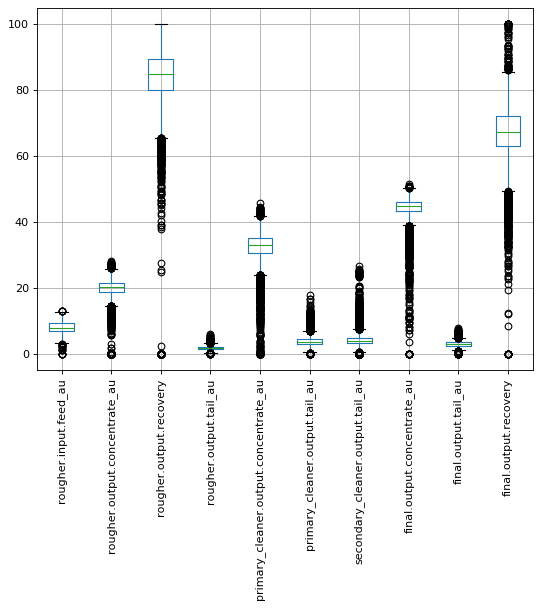

In [41]:

figure(figsize=(8, 6), dpi=80)

train_data.boxplot(column=['rougher.input.feed_au', 
                           'rougher.output.concentrate_au', 
                           'rougher.output.recovery',
       'rougher.output.tail_au',
       'primary_cleaner.output.concentrate_au', 
       'primary_cleaner.output.tail_au',
       'secondary_cleaner.output.tail_au',
      'final.output.concentrate_au',
      'final.output.tail_au',
      'final.output.recovery'], grid='true', fontsize=10, rot=90);

The above boxplots show that the `rougher.input.feed_au` has low concentration (below 20). The median tail Au concentration are very low across all stages. The median concentrate Au concentration keeps increasing in all four stages: rougher, primary_cleaner, secondary_cleaner, and final. Last but not least, the median `rougher.output.recovery` is higher than the median `final.output.recovery`. 

To understand how the concentration of Ag changes depending on the purification stage, we can make boxplots for columns that have Ag concentration from different purification stages. 

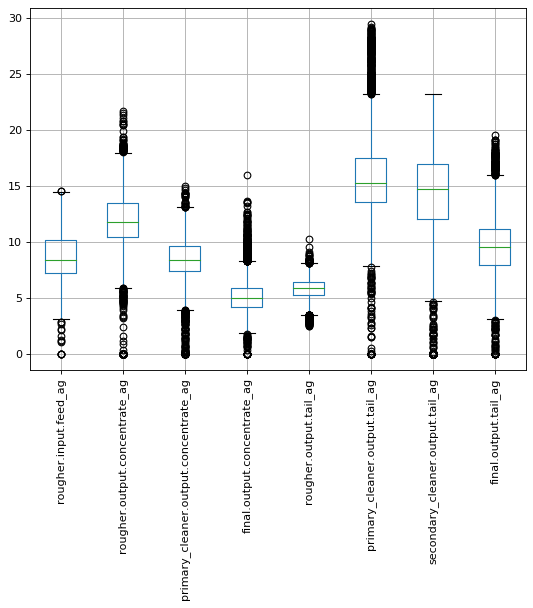

In [42]:

figure(figsize=(8, 6), dpi=80)

train_data.boxplot(column=['rougher.input.feed_ag',
                           'rougher.output.concentrate_ag',
                           'primary_cleaner.output.concentrate_ag',
                           'final.output.concentrate_ag', 
                           'rougher.output.tail_ag',
                           'primary_cleaner.output.tail_ag',
                           'secondary_cleaner.output.tail_ag',
                           'final.output.tail_ag'
    ], grid='true', fontsize=10, rot=90);

The above boxplots show that the Ag concentration is below 30 across all stages and all parameter types. The `rougher.input.feed_ag` has low concentration (below 15). The median output concentrate Ag concentration keeps decreasing in all three stages: rougher, primary_cleaner, and final. Last but not least, the median tail ag concentration increases from rougher to primary_cleaner, then it decreases in the secondary_cleaner and final stages. 

To understand how the concentration of Pb changes depending on the purification stage, we can make boxplots for columns that have Ag concentration from different purification stages. 

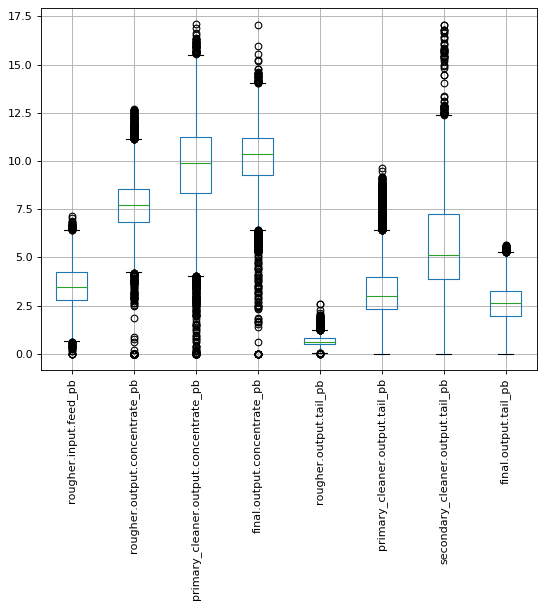

In [43]:

figure(figsize=(8, 6), dpi=80)

train_data.boxplot(column=['rougher.input.feed_pb',
                           'rougher.output.concentrate_pb',
                           'primary_cleaner.output.concentrate_pb',
                           'final.output.concentrate_pb', 
                           'rougher.output.tail_pb',
                           'primary_cleaner.output.tail_pb',
                           'secondary_cleaner.output.tail_pb',
                           'final.output.tail_pb'
    ], grid='true', fontsize=10, rot=90);

The above boxplots show that the Pb concentration is below 17.5 across all stages and all parameter types. The `rougher.input.feed_pb` has low concentration (below 7.5). The median output concentrate Pb concentration keeps increasing slightly in all three stages: rougher, primary_cleaner, and final. Last but not least, the median tail Pb concentration increases from rougher to primary_cleaner and secondary_cleaner,, then it decreases in the final stage. 

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Ok, well done! You confirmed that gold concentration increases throughout the process!

</div>

### Compare the feed particle size distributions

Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, model evaluation will be performed incorrectly.

First, let's look at the feed particle size distributions in the training set.

<Figure size 640x480 with 0 Axes>

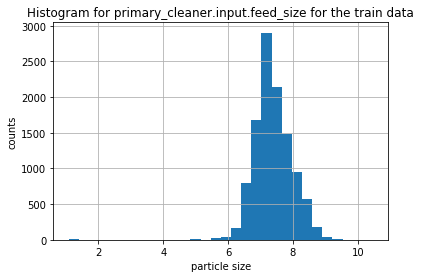

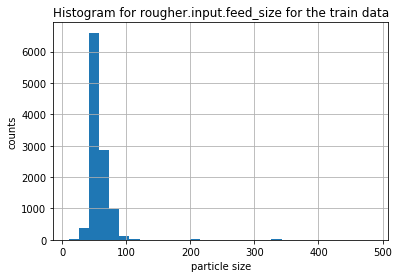

In [44]:
figure(figsize=(8, 6), dpi=80);

train_data.hist(column='primary_cleaner.input.feed_size', bins=30);
plt.title('Histogram for primary_cleaner.input.feed_size for the train data');
plt.xlabel('particle size');
plt.ylabel('counts');


train_data.hist(column='rougher.input.feed_size', bins=30);
plt.title('Histogram for rougher.input.feed_size for the train data');
plt.xlabel('particle size');
plt.ylabel('counts');

The above histgrams show that for the `train_data`, the `primary_cleaner.input.feed_size` is very small with median around 7 and max below 20. The distribution is left-skewed. The range of the `primary_cleaner.input.feed_size` is also very small (less than 10). 

In contrast, the `rougher.input.feed_size` has a very wide range, with median particle size around 60. There are some very small (below 30) and very large (above 100) particle sizes for the `rougher.input.feed_size`.


Next, let's look at the feed particle size distributions in the test set.

<Figure size 640x480 with 0 Axes>

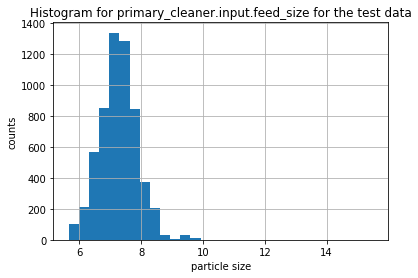

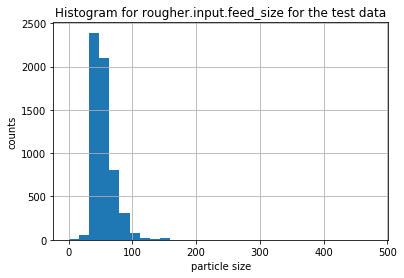

In [45]:
figure(figsize=(8, 6), dpi=80)

test_data.hist(column='primary_cleaner.input.feed_size', bins=30);
plt.title('Histogram for primary_cleaner.input.feed_size for the test data');
plt.xlabel('particle size');
plt.ylabel('counts');

test_data.hist(column='rougher.input.feed_size', bins=30);
plt.title('Histogram for rougher.input.feed_size for the test data');
plt.xlabel('particle size');
plt.ylabel('counts');


The above histgrams show that for the `test_data`, the `primary_cleaner.input.feed_size` is very small with median around 7 and max below 20. The distribution is left-skewed. The range of the `primary_cleaner.input.feed_size` is also very small (less than 15). 

In contrast, the `rougher.input.feed_size` has a very wide range, with median particle size around 60. There are some very small (below 30) and very large (above 100) particle sizes for the `rougher.input.feed_size`.

We conclude that the feed particle size distributions in the training set and in the test set are very similar. Thus, model evaluation can be performed correctly.

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

It would be better to plot the histograms here, box plots can be a bit misleading

</div>

  
<div class="alert alert-info">
  Student's comments: Yes. I have revised the code and conclusions above. Thank you!
</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Awesome! I would further suggest to plot the histograms for the train/test set on the same axis though for easier comparison :)

</div>

### Consider the total concentrations of all substances at different stages of the recovery process: the raw feed, rougher concentrate, and final concentrate. 

Do you notice any abnormal values in the total distribution? If you do, is it worth removing them from both sets? Describe your findings and eliminate anomalies.

First, let's create three new columns that calculate the total concentrations of all substances at different stages (the raw feed, rougher concentrate, and final concentrate) of the recovery process for the `train_data`.

In [46]:
def total_raw_feed(row):
    """
    the total_raw_feed function calculate the 
    total concentrations of all substances in raw feed
    """
    total = row['rougher.input.feed_ag'] + row['rougher.input.feed_pb'] + row['rougher.input.feed_sol'] + row['rougher.input.feed_au'] 
    
    return total
    
# rougher_output_recovery(train_data.loc[0])    

train_data['total.raw.feed'] = train_data.apply(total_raw_feed, axis=1)
# train_data['total.raw.feed']


In [47]:
def total_rougher_concentrate(row):

    total = row['rougher.output.concentrate_ag'] + row['rougher.output.concentrate_pb'] + row['rougher.output.concentrate_sol'] + row['rougher.output.concentrate_au'] 
    
    return total   

train_data['total.rougher.concentrate'] = train_data.apply(total_rougher_concentrate, axis=1)
# train_data['total.rougher.concentrate'] 


In [48]:
def total_final_concentrate(row):

    total = row['final.output.concentrate_ag'] + row['final.output.concentrate_pb'] + row['final.output.concentrate_sol'] + row['final.output.concentrate_au'] 
    
    return total   

train_data['total.final.concentrate'] = train_data.apply(total_final_concentrate, axis=1)
train_data['total.final.concentrate']


0        63.644396
1        63.957723
2        64.311180
3        63.573449
4        64.004667
           ...    
11012    68.098589
11013    68.274362
11014    68.226068
11015    68.200449
11016    68.353154
Name: total.final.concentrate, Length: 11017, dtype: float64

Next, let's look at the boxplots of the three columns for the total concentrations. 

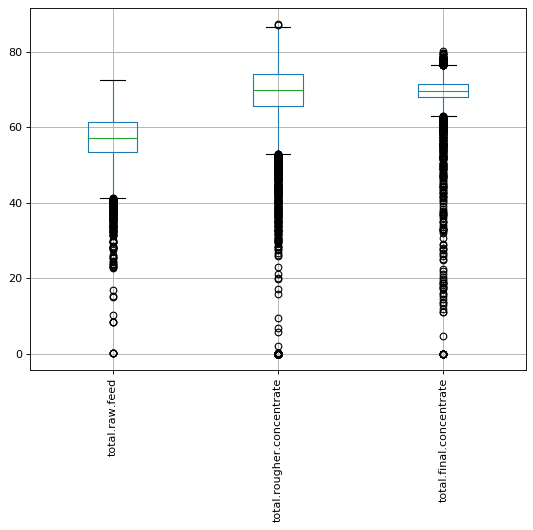

In [49]:
figure(figsize=(8, 6), dpi=80)

train_data.boxplot(column=['total.raw.feed',
                           'total.rougher.concentrate',
                           'total.final.concentrate'
    ], grid='true', fontsize=10, rot=90);


We see that the median total concentrations increase from raw feed to rougher concentrate and final concentrate, which makes sense. But we also noticed that there are zeros for the total, which does not makes sense and should be removed from the dataset.  Thus, we will remove all rows with 0 from the `train_data`.

In [50]:
train_data = train_data.loc[(train_data.loc[:,'total.raw.feed'] != 0) & (train_data.loc[:,'total.rougher.concentrate'] != 0) & (train_data.loc[:,'total.final.concentrate'] != 0) ]

train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10784 entries, 0 to 11016
Data columns (total 90 columns):
date                                                  10784 non-null object
final.output.concentrate_ag                           10784 non-null float64
final.output.concentrate_pb                           10784 non-null float64
final.output.concentrate_sol                          10784 non-null float64
final.output.concentrate_au                           10784 non-null float64
final.output.recovery                                 10784 non-null float64
final.output.tail_ag                                  10784 non-null float64
final.output.tail_pb                                  10784 non-null float64
final.output.tail_sol                                 10784 non-null float64
final.output.tail_au                                  10784 non-null float64
primary_cleaner.input.sulfate                         10784 non-null float64
primary_cleaner.input.depressant             

Let's look at the distribution of the total concentrations again after dropping all rows with 0 total concentrations.

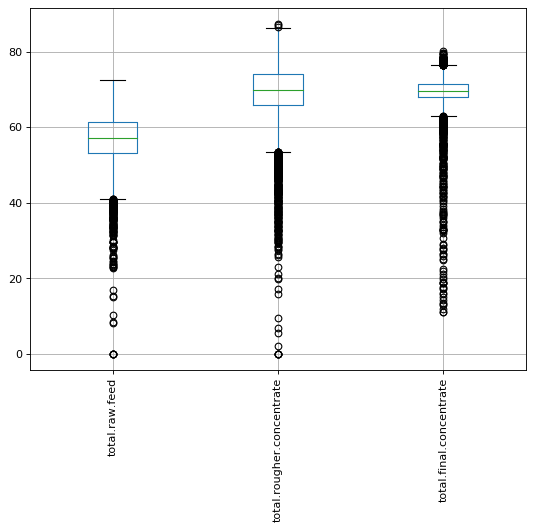

In [51]:
figure(figsize=(8, 6), dpi=80)

train_data.boxplot(column=['total.raw.feed',
                        'total.rougher.concentrate',
                           'total.final.concentrate'
    ], grid='true', fontsize=10, rot=90);


We see that the total final concentrate does not have zero values. I think the `total_data` looks good now!

The `test_data` only have columns about raw feed and does not have columns about the rougher concentrate and final concentrate. We will create a new column `total.raw.feed` for the `test_data`.

In [52]:
test_data['total.raw.feed'] = test_data.apply(total_raw_feed, axis=1)
# test_data['total.raw.feed']

<Figure size 640x480 with 0 Axes>

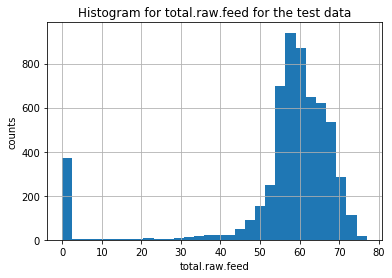

In [53]:
figure(figsize=(8, 6), dpi=80);

test_data.hist(column='total.raw.feed', bins=30);
plt.title('Histogram for total.raw.feed for the test data');
plt.xlabel('total.raw.feed');
plt.ylabel('counts');


In [54]:
test_data = test_data.loc[(test_data.loc[:,'total.raw.feed'] != 0)]

# test_data.info()

<Figure size 640x480 with 0 Axes>

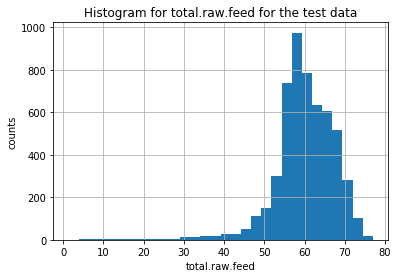

In [55]:
figure(figsize=(8, 6), dpi=80)

test_data.hist(column='total.raw.feed', bins=30);
plt.title('Histogram for total.raw.feed for the test data');
plt.xlabel('total.raw.feed');
plt.ylabel('counts');


Let's look at the distribution of the total raw feed concentrations again after dropping all rows with 0 total raw feed concentrations. We see that the total raw feed concentrate does not have zero values. I think the `test_data` looks good now!

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

Abnormal values were detected and removed! Here as well, I would suggest using histograms, as they are more informative

</div>

<div class="alert alert-info">
  Student's comments: Yes. I have revised the code and conclusions above. Thank you!
</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Great!

</div>

## Build the model

### Write a function to calculate the final sMAPE value

The final metric includes the two values:

Final sMAPE = 25% × sMAPE (rougher) + 75% × sMAPE (final)

sMAPE is the symmetric Mean Absolute Percentage Error. The smaller the sMAPE, the better the model. 

In [56]:
def smape(target, target_pred):
    result = (np.mean(abs(target-target_pred)/((abs(target)+abs(target_pred))/2)))*100
    final_smape = 0.25*result['rougher.output.recovery'] + 0.75*result['final.output.recovery']
    return final_smape

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

The function for SMAPE calculation is correct!

</div>

### Train different models and evaluate them using cross-validation 

#### Linear regression

In [57]:
from sklearn.preprocessing import StandardScaler 

features_train = train_data2.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)

target_train = train_data2[['rougher.output.recovery', 'final.output.recovery']]

scaler = StandardScaler()
scaler.fit(features_train) 
features_train_scaled = scaler.transform(features_train)

# features_train_scaled.shape

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>
    
Selecting the columns like this is very error-prone. It would be better to save the list of the original test set columns and use it for filtering instead.
    
```python
features_train = train_data2[train_data2.columns[14:38]]
target_train = train_data2[train_data2.columns[24:25]]
```
    
</div>
<div class="alert alert-info">
  Student's comments: Yes. I have revised the code and conclusions. Thank you!
</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Ok, that's better!

</div>

In [58]:
model = LinearRegression()
model.fit(features_train_scaled, target_train)
scores = cross_val_score(model, features_train_scaled, target_train, scoring='r2', cv=3)
final_score = np.mean(scores)

print('Average evaluation score for linear regression models:', final_score)

Average evaluation score for linear regression models: -0.41719310338852106


In [59]:
features_test = test_data_merge.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
features_test_scaled = scaler.transform(features_test)

target_test = test_data_merge[['rougher.output.recovery', 'final.output.recovery']]


In [60]:
predict_test_target = model.predict(features_test_scaled)
predict_test_target
# type(predict_test_target)

array([[88.57980743, 72.22977802],
       [91.69474035, 72.64810955],
       [91.40402296, 72.44285091],
       ...,
       [90.44425108, 73.03499163],
       [91.18924015, 75.20010232],
       [90.68713758, 74.15342723]])

In [61]:
smape_results = smape(target_test, predict_test_target)
smape_results
# smape_results['rougher.output.recovery']

9.21010792902861

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

1. $R^2$ scores can be negative. But note that in this project you're supposed to use SMAPE, rather than $R^2$ score. To use it with `cross_val_score`, you need to make a custom scorer object (here's [a guide](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring) how to do it, please read it carefully, especially the point about `greater_is_better` parameter)
2. Using scikit-learn, it's possible to solve the multi target regression task, i.e. if `target` has two columns, `LinearRegression.fit(features, target)` will train a separate model for each column. You can do the same thing manually, if you'd like (i.e. create two separate variables `target_rougher` and `target_final` and train two different models for them).

I'm happy to help, but if you have any further questions or get stuck implementing this, it might be more efficient to contact the tutor for help :)
    
</div>

<div class="alert alert-info">
  Student's comments: Thank you for your input! It really helps a lot!
</div>

#### Random forest regression

In [62]:
# best_smape = np.Inf
# best_depth = 1
# best_num_estimator = 1

# for num_estimator in range(1, 22, 5):
#     for depth in range(1, 8, 2):
#         model = RandomForestRegressor(n_estimators=num_estimator, max_depth=depth, random_state=12345)
#         model.fit(features_train_scaled, target_train)
        
#         predict_test_target = model.predict(features_test_scaled)
#         final_smape = smape(target_test, predict_test_target)
        
#         if final_smape < best_smape:
#             best_smape = final_smape
#             best_depth = depth
#             best_num_estimator = num_estimator
       
#         print(f"max_depth = {depth}, the number of estimator = {num_estimator}, final smape = {final_smape}")

# print()
# print(f"The best model has max_depth = {best_depth}, the number of estimator = {best_num_estimator}, final smape = {best_smape}")     



In [63]:
from sklearn.metrics import make_scorer
# ref: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

best_smape = np.Inf
best_depth = 1
best_num_estimator = 1

for num_estimator in range(1, 22, 5):
    for depth in range(1, 8, 2):
        model = RandomForestRegressor(n_estimators=num_estimator, max_depth=depth, random_state=12345)
        model.fit(features_train_scaled, target_train)
        
        scores = cross_val_score(model, features_train_scaled, target_train, 
                                 scoring = make_scorer(smape, greater_is_better=False), cv=3)
        final_smape = np.mean(-scores)
        
        if final_smape < best_smape:
            best_smape = final_smape
            best_depth = depth
            best_num_estimator = num_estimator
       
        print(f"max_depth = {depth}, the number of estimator = {num_estimator}, final smape = {final_smape}")

print()
print(f"The best model has max_depth = {best_depth}, the number of estimator = {best_num_estimator}, final smape = {best_smape}")     



max_depth = 1, the number of estimator = 1, final smape = 11.093767058075708
max_depth = 3, the number of estimator = 1, final smape = 10.705099112882749
max_depth = 5, the number of estimator = 1, final smape = 12.598052632559714
max_depth = 7, the number of estimator = 1, final smape = 12.939739123972414
max_depth = 1, the number of estimator = 6, final smape = 11.210387615311566
max_depth = 3, the number of estimator = 6, final smape = 10.53080477329962
max_depth = 5, the number of estimator = 6, final smape = 10.610541175727354
max_depth = 7, the number of estimator = 6, final smape = 10.757312434051963
max_depth = 1, the number of estimator = 11, final smape = 11.144242230075848
max_depth = 3, the number of estimator = 11, final smape = 10.497894474536276
max_depth = 5, the number of estimator = 11, final smape = 10.415669475524282
max_depth = 7, the number of estimator = 11, final smape = 10.984294339001492
max_depth = 1, the number of estimator = 16, final smape = 11.12884572007

### Pick the best model and test it using the test set

The best random forest regression model has final smape 10.42. Thus, we have determined the best random forest regression model has max_depth = 5 and the number of estimator = 11.

Let's test the best model using the test set. 

In [64]:
model = RandomForestRegressor(n_estimators=11, max_depth=5, random_state=12345)
model.fit(features_train_scaled, target_train)
        
predict_test_target = model.predict(features_test_scaled)
final_smape = smape(target_test, predict_test_target)
print(f"The best random forest regression model has final smape = {final_smape}")   

The best random forest regression model has final smape = 9.097656468087914



Using the test set, the linear regression model has final smape 9.21, and the best random forest regression model has final smape = 9.10. Thus, the random forest regression model with max_depth = 5 and the number of estimator = 11 is the best model. 

<div class="alert alert-danger">
<s><b>Reviewer's comment V3</b>

1. It's not really appropriate to tune hyperparameters using the test set because that leads to a biased test set score (i.e. overly optimistic). The test set should be used only for the evaluation of the final model (when we already fixed hyperparameters using validation set/cross-validation). In this project you're supposed to use cross-validation in particular. As noted in a previous comment, to use SMAPE scoring with `cross_val_score`, you need to make a custom scorer object (here's [a guide](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring) how to do it, please read it carefully, especially the point about `greater_is_better` parameter). So, to sum up, you just need to replace the evaluation on the test set in your hyperparameter tuning loop with a call to `cross_val_score` with appropriate scoring
    
2. One last touch: please add a simple baseline, e.g. a constant model always predicting train set target mean or median. It's convenient to use [DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) for this

</div>

<div class="alert alert-info">
  Student's comments: Thank you for your input! I have revised my code above.
</div>

<div class="alert alert-success">
<b>Reviewer's comment V4</b>

Ok, great!

</div>

## Conclusion

In this project, we developed an optimal machine learning model for Zyfra for the purpose of gold recovery from gold ore. Using symmetric Mean Absolute Percentage Error (sMAPE) as the model evaluation metric, we found the best model is random forest regression model with max_depth = 5 and the number of estimator = 11. The model has final smape 9.10.

## Task completion check list

- [x]  Jupyter Notebook
- [ ]  Code is error free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  Step 1 performed: data has been prepared
    - [ ]  The formula for calculating the flotation effectiveness has been checked
    - [ ]  The features unavailable in the test set have been analyzed
    - [ ]  The data has been preprocessed
- [ ]  Step 2 performed: data has been analyzed
    - [ ]  The change in concentration of elements has been analyzed at each stage
    - [ ]  Distributions of particle size have been analyzed for training set and test set
    - [ ]  Total concentrations have been analyzed
    - [ ]  Abnormal values have been analyzed and processed
- [ ]  Step 3 performed:  model for prediction has been built
    - [ ]  Final *sMAPE* calculation function has been written
    - [ ]  Several models have been trained and tested
    - [ ]  The best model has been picked and tested using the test set